In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
import cv2
import shutil
import PIL

from fastai import *
from fastai.vision import *

import json

In [3]:
NUM_SAMPLES_PER_CLASS = 5_000
NUM_VAL = 50 * 340

## Generate data from csvs

In [4]:
mkdir data/txt

mkdir: cannot create directory ‘data/txt’: File exists


In [7]:
mkdir data/txt/train

In [10]:
mkdir data/txt/test

In [4]:
def create_train_txts_from_df(path):
    df = pd.read_csv(path)
    for row in df.sample(NUM_SAMPLES_PER_CLASS).iterrows():
        example = {
            'countrycode': row[1].countrycode,
            'drawing': json.loads(row[1].drawing),
            'key_id': row[1].key_id,
            'recognized': row[1].recognized,
            'word': '_'.join(row[1].word.split())
        }
        with open(f'data/txt/train/{example["word"]}_{example["key_id"]}.txt', mode='w') as f: json.dump(example, f)
            
def create_test_txts_from_df(path):
    df = pd.read_csv(path)
    for row in df.iterrows():
        example = {
            'countrycode': row[1].countrycode,
            'drawing': json.loads(row[1].drawing),
            'key_id': row[1].key_id,
            'word': 'unknown'
        }
        with open(f'data/txt/test/{example["word"]}_{example["key_id"]}.txt', mode='w') as f: json.dump(example, f)

In [11]:
%time create_test_txts_from_df('data/test_simplified.csv')

CPU times: user 34.3 s, sys: 3.12 s, total: 37.5 s
Wall time: 37.6 s


In [9]:
#%time for p in Path('data/train').iterdir(): create_train_txts_from_df(p)

In [12]:
# Doing it like this so %time works properly and I can have a progress indicator.
def create_train_data():
    i = 1
    for p in Path('data/train').iterdir(): 
        %time create_train_txts_from_df(p)
        print(i, "/", len(os.listdir(Path('data/train'))))
        print(str(p)[45:])
        i += 1
    return "Done!"

%time create_train_data()

CPU times: user 1.76 s, sys: 200 ms, total: 1.96 s
Wall time: 2.26 s
1 / 340

CPU times: user 1.96 s, sys: 284 ms, total: 2.24 s
Wall time: 2.45 s
2 / 340

CPU times: user 2.74 s, sys: 264 ms, total: 3 s
Wall time: 3.44 s
3 / 340

CPU times: user 2.82 s, sys: 260 ms, total: 3.08 s
Wall time: 3.46 s
4 / 340

CPU times: user 1.73 s, sys: 184 ms, total: 1.91 s
Wall time: 2.15 s
5 / 340

CPU times: user 2.55 s, sys: 220 ms, total: 2.77 s
Wall time: 3.08 s
6 / 340

CPU times: user 2.89 s, sys: 264 ms, total: 3.16 s
Wall time: 3.53 s
7 / 340

CPU times: user 2.36 s, sys: 216 ms, total: 2.57 s
Wall time: 2.84 s
8 / 340

CPU times: user 2.04 s, sys: 184 ms, total: 2.23 s
Wall time: 2.46 s
9 / 340

CPU times: user 2.79 s, sys: 196 ms, total: 2.99 s
Wall time: 3.38 s
10 / 340

CPU times: user 2.89 s, sys: 232 ms, total: 3.12 s
Wall time: 3.45 s
11 / 340

CPU times: user 1.5 s, sys: 216 ms, total: 1.71 s
Wall time: 1.95 s
12 / 340

CPU times: user 2.56 s, sys: 240 ms, total: 2.8 s
Wall time: 3.21

CPU times: user 2.25 s, sys: 228 ms, total: 2.48 s
Wall time: 2.55 s
106 / 340

CPU times: user 2.43 s, sys: 156 ms, total: 2.58 s
Wall time: 3.1 s
107 / 340

CPU times: user 2.59 s, sys: 280 ms, total: 2.87 s
Wall time: 2.87 s
108 / 340

CPU times: user 3.17 s, sys: 240 ms, total: 3.41 s
Wall time: 3.89 s
109 / 340

CPU times: user 2.4 s, sys: 204 ms, total: 2.6 s
Wall time: 2.97 s
110 / 340

CPU times: user 1.51 s, sys: 184 ms, total: 1.7 s
Wall time: 2.04 s
111 / 340

CPU times: user 2.35 s, sys: 160 ms, total: 2.51 s
Wall time: 2.89 s
112 / 340

CPU times: user 2.44 s, sys: 152 ms, total: 2.59 s
Wall time: 2.98 s
113 / 340

CPU times: user 2.02 s, sys: 244 ms, total: 2.26 s
Wall time: 2.67 s
114 / 340

CPU times: user 1.87 s, sys: 184 ms, total: 2.06 s
Wall time: 2.45 s
115 / 340

CPU times: user 2.33 s, sys: 200 ms, total: 2.53 s
Wall time: 2.96 s
116 / 340

CPU times: user 1.97 s, sys: 180 ms, total: 2.15 s
Wall time: 2.55 s
117 / 340

CPU times: user 2.5 s, sys: 192 ms, total: 2

CPU times: user 1.99 s, sys: 200 ms, total: 2.19 s
Wall time: 4.06 s
209 / 340

CPU times: user 2 s, sys: 204 ms, total: 2.2 s
Wall time: 3.19 s
210 / 340

CPU times: user 2.41 s, sys: 236 ms, total: 2.65 s
Wall time: 3.58 s
211 / 340

CPU times: user 2.89 s, sys: 252 ms, total: 3.14 s
Wall time: 4.16 s
212 / 340

CPU times: user 2.92 s, sys: 196 ms, total: 3.12 s
Wall time: 4.32 s
213 / 340

CPU times: user 2.3 s, sys: 212 ms, total: 2.52 s
Wall time: 2.59 s
214 / 340

CPU times: user 1.92 s, sys: 172 ms, total: 2.1 s
Wall time: 2.92 s
215 / 340

CPU times: user 2.56 s, sys: 212 ms, total: 2.78 s
Wall time: 3.7 s
216 / 340

CPU times: user 1.86 s, sys: 168 ms, total: 2.03 s
Wall time: 3.2 s
217 / 340

CPU times: user 2.66 s, sys: 236 ms, total: 2.9 s
Wall time: 4.92 s
218 / 340

CPU times: user 2.51 s, sys: 192 ms, total: 2.7 s
Wall time: 3.7 s
219 / 340

CPU times: user 1.96 s, sys: 160 ms, total: 2.12 s
Wall time: 3.08 s
220 / 340

CPU times: user 1.79 s, sys: 204 ms, total: 2 s
Wal

CPU times: user 2.77 s, sys: 172 ms, total: 2.94 s
Wall time: 4.78 s
313 / 340

CPU times: user 2.13 s, sys: 220 ms, total: 2.35 s
Wall time: 3.92 s
314 / 340

CPU times: user 2.13 s, sys: 248 ms, total: 2.38 s
Wall time: 5.22 s
315 / 340

CPU times: user 2.26 s, sys: 256 ms, total: 2.51 s
Wall time: 4.24 s
316 / 340

CPU times: user 3.47 s, sys: 236 ms, total: 3.7 s
Wall time: 5.79 s
317 / 340

CPU times: user 2.28 s, sys: 228 ms, total: 2.51 s
Wall time: 5.45 s
318 / 340

CPU times: user 1.86 s, sys: 208 ms, total: 2.07 s
Wall time: 2.83 s
319 / 340

CPU times: user 2.3 s, sys: 232 ms, total: 2.53 s
Wall time: 2.81 s
320 / 340

CPU times: user 3.1 s, sys: 236 ms, total: 3.34 s
Wall time: 6.53 s
321 / 340

CPU times: user 3.09 s, sys: 252 ms, total: 3.34 s
Wall time: 5.14 s
322 / 340

CPU times: user 1.98 s, sys: 176 ms, total: 2.15 s
Wall time: 3.7 s
323 / 340

CPU times: user 2.8 s, sys: 256 ms, total: 3.06 s
Wall time: 4.63 s
324 / 340

CPU times: user 1.83 s, sys: 232 ms, total: 2

'Done!'

## Create ImageDataBunch using the data block API

In [5]:
sz = 128

In [6]:
%time inp_list = InputList.from_folder('data/txt/train/')

CPU times: user 22 s, sys: 5 s, total: 27 s
Wall time: 27 s


In [7]:
%time label_list = inp_list.label_from_re('\A([a-zA-Z-_]*)_\d')

CPU times: user 5.7 s, sys: 32 ms, total: 5.73 s
Wall time: 5.72 s


In [8]:
idxs = np.arange(label_list.files.shape[0])
np.random.shuffle(idxs)
val_fns = set(label_list.files[idxs[:NUM_VAL]])

In [9]:
%time split = label_list.split_by_files(val_fns)

CPU times: user 2.57 s, sys: 244 ms, total: 2.82 s
Wall time: 2.82 s


In [10]:
%time _ = split.add_test(InputList.from_folder('data/txt/test/'))

CPU times: user 1.3 s, sys: 244 ms, total: 1.54 s
Wall time: 1.54 s


In [11]:
classes = set(label_list.labels)

# can this change if you train on different data?
# could this be useful for prediction / making a submission?
#
# might want to comment out the creation and saving and only leave loading uncommented on consecutive runs
class2idx = {c: i for i, c in enumerate(classes)}
idx2class = {i: c for c, i in class2idx.items()}
pd.to_pickle(class2idx, 'data/class2idx.pkl')
pd.to_pickle(idx2class, 'data/idx2class.pkl')

class2idx =pd.read_pickle('data/class2idx.pkl')
idx2class = pd.read_pickle('data/idx2class.pkl')

In [12]:
# https://www.kaggle.com/gaborfodor/greyscale-mobilenet-lb-0-892
BASE_SIZE = 256
def list2drawing(raw_strokes, size=sz, lw=6, time_color=False):
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for t, stroke in enumerate(raw_strokes):
        for i in range(len(stroke[0]) - 1):
            color = 255 - min(t, 10) * 13 if time_color else 255
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]),
                         (stroke[0][i + 1], stroke[1][i + 1]), color, lw)
#     img = cv2.copyMakeBorder(img,4,4,4,4,cv2.BORDER_CONSTANT)
    if size != BASE_SIZE:
        return cv2.resize(img, (size, size), interpolation=cv2.INTER_LINEAR)
    else:
        return img

In [13]:
def drawing2tensor(drawing):
    rgb = cv2.cvtColor(drawing,cv2.COLOR_GRAY2RGB)
    rgb = rgb.transpose(2,0,1).astype(np.float32)
    return torch.from_numpy(rgb)

In [14]:
class QuickdrawDataset(DatasetBase):
    def __init__(self, x, y):
        super().__init__(x, y, classes=list(class2idx.keys()), c=340, task_type=TaskType.Single, class2idx=class2idx)
    def _get_x(self,i):
        with open(self.x[i]) as f: j = json.load(f)
        drawing = list2drawing(j['drawing'])
        tensor = drawing2tensor(drawing)
        return Image(tensor.div_(255))

In [15]:
%time dss = split.datasets(QuickdrawDataset)

CPU times: user 496 ms, sys: 0 ns, total: 496 ms
Wall time: 494 ms


In [16]:
bs = 500

In [17]:
train_dl = DataLoader(dss.train_ds, batch_size=bs, shuffle=True, num_workers=12)
valid_dl = DataLoader(dss.valid_ds, batch_size=2*bs, shuffle=False, num_workers=12)
test_dl = DataLoader(dss.test_ds, batch_size=2*bs, shuffle=False, num_workers=12)

In [18]:
data_bunch = ImageDataBunch(train_dl, valid_dl, test_dl)

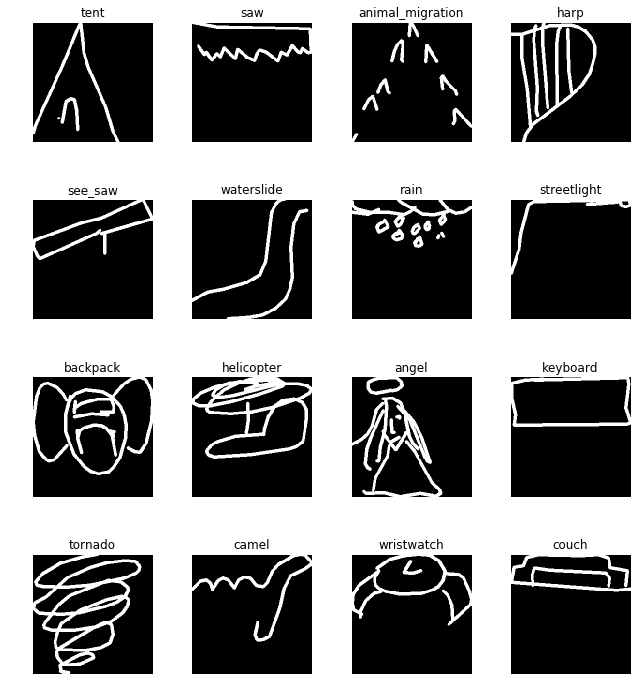

In [19]:
data_bunch.show_batch(rows=4)

In [20]:
# same argument as above - you might want to save this value for later use
batch_stats = data_bunch.batch_stats()
pd.to_pickle(batch_stats, 'data/batch_stats.pkl')
batch_stats = pd.read_pickle('data/batch_stats.pkl')

In [21]:
data_bunch.normalize(batch_stats);

## Train

In [22]:
name = f'res34-{sz}-two'

In [23]:
# https://github.com/benhamner/Metrics/blob/master/Python/ml_metrics/average_precision.py
def apk(actual, predicted, k=10):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [24]:
def map3(preds, targs):
    predicted_idxs = preds.sort(descending=True)[1]
    top_3 = predicted_idxs[:, :3]
    res = mapk([[t] for t in targs.cpu().numpy()], top_3.cpu().numpy(), 3)
    return torch.tensor(res)

In [25]:
learn = create_cnn(data_bunch, models.resnet34, metrics=[accuracy, map3])

In [26]:
learn.fit_one_cycle(2)

Total time: 1:10:23
epoch  train_loss  valid_loss  accuracy  map3    
1      1.558074    1.312418    0.672353  0.751637  (35:17)
2      1.384945    1.187658    0.703824  0.776922  (35:05)



In [27]:
learn.save(f'{name}-stage-1')

In [28]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(6, max_lr=6e-4)

epoch,train_loss,valid_loss,accuracy,map3
1,1.181118,1.096917,0.722706,0.793990
2,1.073095,1.003445,0.743353,0.811461


KeyboardInterrupt: 

In [ ]:
learn.save(f'{name}-stage-2')

In [ ]:
learn.load(f'{name}-stage-2');

In [ ]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [ ]:
top_3 = np.argsort(preds.numpy())[:, ::-1][:, :3]

In [ ]:
labels = []
for i in range(top_3.shape[0]):
    labels.append(' '.join([learn.data.train_ds.classes[idx] for idx in top_3[i]]))

In [ ]:
labels[1]

In [ ]:
test_dl.dataset[1][0]

In [ ]:
key_ids = [path.stem.split('_')[1] for path in learn.data.test_dl.dl.dataset.x]

In [ ]:
os.makedirs(f'subs', exist_ok=True)
sub = pd.DataFrame({'key_id': key_ids, 'word': labels})
sub.to_csv(f'subs/{name}.csv.gz', index=False, compression='gzip')

In [ ]:
pd.read_csv(f'subs/{name}.csv.gz').head()

In [ ]:
# !kaggle competitions submit -c quickdraw-doodle-recognition -f subs/{name}.csv.gz -m "{name}"